In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L = 30
N = L**2 ## No. of spins
J = 1.0 # Coupling constant

In [3]:
def create_picture(positions,colors):
    plt.cla()
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca())
    for pos, col in zip(positions,colors):
        square = plt.Rectangle((pos[0], pos[1]), 0.8, 0.8, fc = col)
        plt.gca().add_patch(square)
        
def color(i):
    if i == 1: return 'r'
    else: return 'b'

In [4]:
## Identifies the nearest neighbors of spin numbered i.
## Note that edges are identified, so that there are no boundaries.

def right(i):
    if (i+1)%L == 0: return i+1-L 
    else: return i+1

def left(i):
    if i%L == 0: return i-1+L
    else: return i-1

def up(i):
    return (i+L)%N

def down(i):
    return (i-L+N)%N

In [5]:
## List of neighbors of each spin.
neighbors = [[right(i),left(i),up(i),down(i)] for i in range(N)]
## coordinates of each spin. Just for visualization.
coordinates = [[i%L,i//L] for i in range(N)]
orientations = [1,-1]
spins = []
colors = []

In [6]:
##### initial spin assignment ##################

for i in range(N):
    spin = np.random.choice(orientations)
    spins.append(spin)

In [7]:
nsteps = 10000*N
T = 1.0 # Temperature, in units of J/k_B.
beta = 1/T
for step in tqdm(range(nsteps)):
    k = np.random.randint(0, N - 1) ### Choose a random spin and try to flip it.
    delta_E = 2.0 * spins[k] * sum(spins[j] for j in neighbors[k]) # Change in energy due to the spin flip.
    if np.random.uniform(0.0, 1.0) < np.exp(-beta * delta_E): # Metropolis accepatance probability.
        spins[k] *= -1

100%|█████████████████████████████| 9000000/9000000 [00:42<00:00, 213748.15it/s]


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

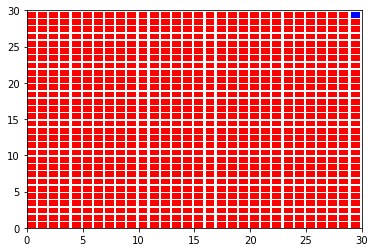

In [8]:
for i in range(N):
    colors.append(color(spins[i]))

create_picture(coordinates,colors);